# The OCIL Instance with the Entropy and the Weight of Attritubes

### Research manuscript - timestamp:2020.09.29 
Have built an OCIL instance by python, and introduced the entropy and the weight of attritubes successfully. And the problems about the calculation of entropy had been solved eventually. Through experiments, I found that the effects of clustering are different between different weights, indicating that the clustering centers and clustering performance of categorical and numerical in the same mixed data set are different. Therefore, determining the weight is a key step of mixed data clustering, and ultimately affects the final clustering effect. The effect of weight is visualized by drawing a curve, but there is no more suitable mixed data set for the time being, and the iris data set could only be temporarily used.

## The Entropy Calculation Function
Constructed a function to calculate the entropy of categorical variables, the input of the function is the matrix of categorical variables, and the output is the weight of each attritubes based on entropy. The code and the performance of function are as follows (a random matirx contain 30000*3 categorical sampling):

In [33]:
import numpy as np
import random
import math
from collections import Counter

def entropyOCIL(dataC): # get the entropy of each Ar, input: whole data or categorical data, output: the list
    entropyList = []
    freqList = []
    parameterList = []
    entropyAttriList = []
    frequencyAttri = {}
    categRawData = dataC
    
    for col in range(dataC.shape[1]):
        freqList = []
        entropyList = []
        frequencyAttri = dict(Counter(categRawData[:, col]))
        for i in frequencyAttri:
            entropyList.append(frequencyAttri[i] / len(categRawData[:, col]))
        for i in range(len(entropyList)):
            freqList.append(-entropyList[i]*math.log(entropyList[i]))
        entropyAttriList.append(sum(freqList)/len(frequencyAttri.items()))
    for i in range(len(entropyAttriList)):
        parameterList.append(entropyAttriList[i]/sum(entropyAttriList))
    
    return parameterList
strLibrary1 = np.array([["aa","aa","df","dx","aa","df"],["aa","ab","df","dx","az","dc"],["aa","aa","aa","aa","aa","df"]])

categData = np.ones((30000,3),dtype = object)
for i in range(categData.shape[1]):
    for j in range(categData.shape[0]):
        categData[j,i] = random.choice(strLibrary1[i,:])

np.set_printoptions(threshold = 0)
print(categData)
print("the weight of each attritubes: ",entropyOCIL(categData))



[['df' 'aa' 'df']
 ['df' 'dx' 'aa']
 ['aa' 'dx' 'aa']
 ...
 ['aa' 'ab' 'df']
 ['aa' 'ab' 'aa']
 ['df' 'dx' 'aa']]
the weight of each attritubes:  [0.39214705776029324, 0.3475784608199187, 0.26027448141978804]


##  The Image of Weight Coefficient and the Sampling Distribution 
Because there is no suitable mixed data set for the time being, I used the .target vector of the iris data set as the categorical data set. Therefore, it can be considered that the accuracy of categorical variable clustering is 100%. I drew the changing curve of clustering accuracy under different weights of categorical attritubes. It can be seen that the clustering performance of categorical features and numerical features are often different, and the overall clustering accuracy also changes as the weight changes. The next significant step is to find more suitable data sets and explore the varietys in weights. The second figure describes the clustering performance under 0.0 categorical attritubes weight which means the weight of numerical clustering is 100%. It can be seen that the clustering performance of the numerical attritubes of the OCIL algorithm in the paper is still very ideal.

input the cluster number: 3
max iterative times 20


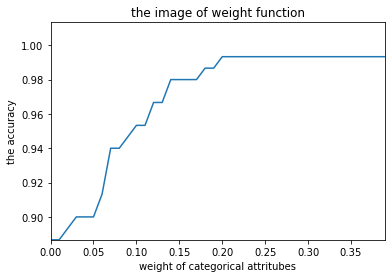

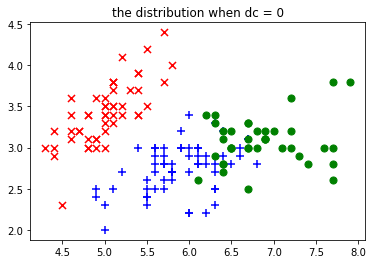

In [38]:
# OCIL instance by python

import numpy as np
import random
import math
import copy
from collections import Counter

def check(data): #input:data matirx(two dims) output:the index list of the categorical and numerical attributes
    m, n = data.shape
    N = []
    C = []

    for i in range(n):
        try:
            if isinstance(data[0,i],int) or isinstance(data[0,i],float):
                N.append(i)
            elif isinstance(data[0,i],str):
                C.append(i)
            else:
                raise ValueError("the %d column is not a number or a string column" % i)
        except TypeError as te:
            print(te)
    
    return C, N

def entropyOCIL(dataC): # get the entropy of each Ar, input: whole data or categorical data, output: the list
    entropyList = []
    freqList = []
    parameterList = []
    entropyAttriList = []
    frequencyAttri = {}
    categRawData = dataC
    
    for col in range(dataC.shape[1]):
        freqList = []
        entropyList = []
        frequencyAttri = dict(Counter(categRawData[:, col]))
        for i in frequencyAttri:
            entropyList.append(frequencyAttri[i] / len(categRawData[:, col]))
        for i in range(len(entropyList)):
            freqList.append(-entropyList[i]*math.log(entropyList[i]))
        entropyAttriList.append(sum(freqList)/len(frequencyAttri.items()))
    for i in range(len(entropyAttriList)):
        parameterList.append(entropyAttriList[i]/sum(entropyAttriList))
    
    return parameterList

def similarityCategorical(Categorical, cluster, entropy):#get the similarity between CateAttri input:Categorical array, cluster array，entropy list. output:the similarity between two arrays, float
    hemingwayDis = []
    simiCategorical = np.array([])
    for i in range(len(Categorical)):
        if Categorical[i] == cluster[i]:
            hemingwayDis.append(1)
        else:
            hemingwayDis.append(0)
    simiCategorical = np.multiply(np.array(hemingwayDis), np.array(entropy))

    return sum(simiCategorical.tolist())

def similarityNumerical(Numerical, cluster,clusterTarget):#get the similarity of NumAttri in input:Numerical array,cluster:matrix of the cluster center,clustertarget: the target cluster center output:similarity float
    
    distanceList = []
    for i in range(len(cluster)):
        distanceList.append(math.exp(-0.5*sum((Numerical - cluster[i,:])**2)))

    return math.exp(-0.5*sum((Numerical-clusterTarget)**2))/sum(distanceList)


                  
def clusterFinder(dataC, dataN, clusterC, clusterN, dc, dn,):#get the clusterlabel of each data samples, input:data,cluster,dc:categorical weight dn:numerical weight,output: the list of clusterlabel
    
    similarity = []
    clusterLabel = []
    entropyInstance = entropyOCIL(dataC)
    for i in range(dataC.shape[0]):
        similarity = []
        
        for j in range(clusterC.shape[0]):
           similarity.append(dc*similarityCategorical(dataC[i,:], clusterC[j,:], entropyInstance)+dn*similarityNumerical(dataN[i,:], clusterN, clusterN[j,:]))
        clusterLabel.append(similarity.index(max(similarity)))
    return clusterLabel   

def clusterUpdate(dataC, dataN, clusterLabel):#get the new cluster, input:data matrix, clusterlabel output: the new cluster matrix
    clusterContainer = []
    attributeContainer = []
    clusterContainerN = []
    attributeContainerN = []
    clusterNew = np.zeros((len(Counter(clusterLabel)),dataC.shape[1]),dtype = object)
    clusterNewN = np.zeros((len(Counter(clusterLabel)),dataN.shape[1]),dtype = float)
    

    for i in range(len(Counter(clusterLabel))):
        clusterContainer = []
        for k in range(dataC.shape[1]):
            attributeContainer = []
            for j in range(dataC.shape[0]):
                if clusterLabel[j] == i:
                    attributeContainer.append(dataC[j,k])
            clusterContainer.append(Counter(attributeContainer).most_common(1)[0][0])
        clusterNew[i,:] = copy.deepcopy(clusterContainer)
    
    
    for i in range(len(Counter(clusterLabel))):
        clusterContainerN = []
        for k in range(dataN.shape[1]):
            attributeContainerN = []
            for j in range(dataN.shape[0]):
                if clusterLabel[j] == i:
                    attributeContainerN.append(dataN[j,k])
            clusterContainerN.append(sum(attributeContainerN)/len(attributeContainerN))
        clusterNewN[i,:] = copy.deepcopy(clusterContainerN)
    
    
    return clusterNew, clusterNewN
                    
def iterativeFunc(dataC, dataN, clusterC, clusterN, iteramax, dc):#do the iterative work input:data and cluster,iterative max times output:the clusterlabel and the clusterArray
    dn = 1-dc
    clusterLabel = []
    clusterLabelOld = []
    clusterCNew = copy.deepcopy(clusterC)
    clusterNNew = copy.deepcopy(clusterN)
    for i in range(iteramax):
        clusterLabel = clusterFinder(dataC, dataN, clusterCNew, clusterNNew, dc, dn)
        if clusterLabel == clusterLabelOld:
            #print("final iterative times: ",i)
            break
        clusterLabelOld = copy.deepcopy(clusterLabel)
        clusterCNew, clusterNNew = clusterUpdate(dataC, dataN, clusterLabel)
    
    #print("final iterative timesL ", iteramax)

    return clusterCNew, clusterNNew, clusterLabel



if __name__ == "__main__":
    from sklearn.datasets import load_iris
    from collections import Counter
    import matplotlib.pyplot as plt

    iris = load_iris()
    dc = 0.0
    itera = 0
    clusterlabel = []
    k = int(input("input the cluster number: "))
    klist = [30,80,120]
    clusterNNew = iris.data[klist,:]
    clusterCate = iris.target.reshape(150,1)
    clusterCNew = copy.deepcopy(clusterCate[klist,:])
    itera = int(input("max iterative times "))
    clusterCcontainer = np.zeros((k,iris.data.shape[1]),dtype = object)
    clusterNcontainer = np.empty((k,iris.data.shape[1]),dtype = float)
    weightList = np.arange(0,0.4,0.01)
    accuracyRate = []
    for i in range(len(weightList)):
        clusterCcontainer, clusterNcontainer, clusterlabel = iterativeFunc(clusterCate, iris.data, clusterCNew, clusterNNew, itera, weightList[i])
        accuracyRate.append(sum(clusterlabel == iris.target)/len(iris.target))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set(xlim=[weightList[0],weightList[-1]],ylim=(accuracyRate[0],accuracyRate[-1]+0.02), title='the image of weight function',
            ylabel='the accuracy', xlabel='weight of categorical attritubes')
    ax1.plot(weightList,accuracyRate)
    plt.show()

    clusterCcontainer, clusterNcontainer, clusterlabel = iterativeFunc(clusterCate, iris.data, clusterCNew, clusterNNew, itera, 0.01)
    cluster1 = {}
    for i in range(len(Counter(clusterlabel))):
        clustering = []
        for j in range(len(clusterlabel)):
            if clusterlabel[j] == i:
                clustering.append(j)
        cluster1[i] = clustering
    data1 = iris.data[cluster1[0],:]
    data2 = iris.data[cluster1[1],:]
    data3 = iris.data[cluster1[2],:]
    plt.scatter(data1[:,0],data1[:,1],marker = 'x',color = 'red', s = 50,label = 'first')
    plt.scatter(data2[:,0],data2[:,1],marker = '+',color = 'blue', s = 50,label = 'second')
    plt.scatter(data3[:,0],data3[:,1],marker = 'o',color = 'green', s = 50,label = 'third')
    plt.title('the distribution when dc = 0')
    plt.show()


## Next research plan
1. choose a more appropriate mixed datasets.
2. find the quantitative performance of the clustering algorithm ( the indicator like DB, XB e.g.).
3. explore more latest clustering algorithms and the calculation of similarity.
 
